#Preprocessing


Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Importing Dataset

In [ ]:
dataset = pd.read_csv('glass.csv')
X=dataset.iloc[ : , :-1].values
y=dataset.iloc[ : ,-1].values


In [ ]:
print(X)


[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [ ]:
print(y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


Taking Care of missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,:-1])
X[:,:-1]=imputer.transform(X[:,:-1])


Training and Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,1:3] = sc.fit_transform(X_train[:,1:3])  #Fit calcultes the mean and standard deviation while Transform actually puts the mean and standard deviation in the standardization formula
X_test[:,1:3] = sc.fit_transform(X_test[:,1:3])

X_train[:,4:5] = sc.fit_transform(X_train[:,4:5])  #Fit calcultes the mean and standard deviation while Transform actually puts the mean and standard deviation in the standardization formula
X_test[:,4:5] = sc.fit_transform(X_test[:,4:5])

X_train[:,6:7] = sc.fit_transform(X_train[:,6:7])  #Fit calcultes the mean and standard deviation while Transform actually puts the mean and standard deviation in the standardization formula
X_test[:,6:7] = sc.fit_transform(X_test[:,6:7])


In [ ]:
print(X_train)


[[ 1.52667     0.70984522  0.71823531 ...  0.72309469  0.
   0.1       ]
 [ 1.51514     1.76674346 -1.88787514 ... -0.36101533  0.56
   0.        ]
 [ 1.51721    -0.66658038  0.56327739 ... -0.33069058  0.
   0.        ]
 ...
 [ 1.51593    -0.39621107  0.64075635 ... -0.78556192  0.
   0.        ]
 [ 1.5169     -0.10126272  0.60553864 ... -0.57328863  0.
   0.        ]
 [ 1.51797    -0.82634407  0.56327739 ... -0.14116085  0.
   0.        ]]


#Applying K means with k=2

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# Choose a value of k and fit the k-means model on the training data
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

# Get the labels assigned to each training data point
train_labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


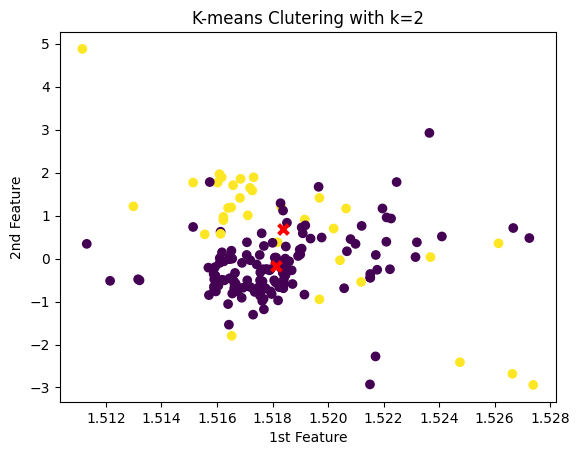

In [ ]:
# Plot the clusters along with the centroids
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=50, linewidths=3, color='r')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.title('K-means Clutering with k=2')
plt.show()


#Determining the best value of k using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

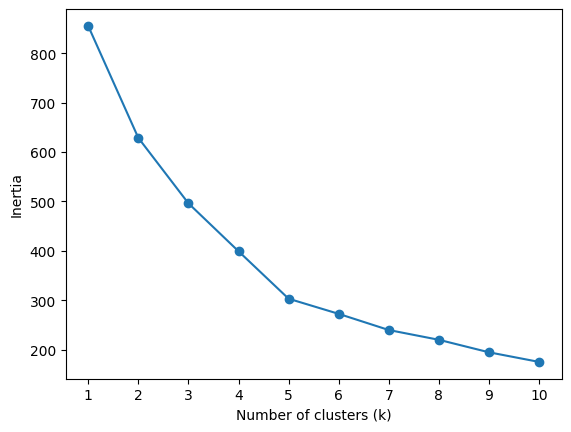

In [ ]:
# Determining suitable value of k using elbow method
inertias = []
ks = range(1, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()



In [ ]:
# Finding the optimal value of k
diff = np.diff(inertias)
elbow_idx = np.argmin(diff) + 1
optimal_k_value = ks[elbow_idx]
print(f"The optimal value of k is: {optimal_k_value}")


The optimal value of k is: 2


In [ ]:
# Print the number of data points in each cluster
cluster_counts = np.bincount(train_labels)
for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx}: {count} data points")

Cluster 0: 136 data points
Cluster 1: 35 data points


In [ ]:
total_points = X_train.shape[0]
print(f"Total number of points: {total_points}")

Total number of points: 171


#Applying KMeans from scratch

In [ ]:
# Define the KMeans class
class KMeans:
    def __init__(self, k, init_centers=None, max_iter=100):
        self.k = k
        self.centers = init_centers
        self.max_iter = max_iter

    def fit(self, X):
        if self.centers is None:
            self.centers = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for i in range(self.max_iter):
            old_centers = np.copy(self.centers)
            clusters = self.predict(X)
            for j in range(self.k):
                points = [X[k] for k in range(len(X)) if clusters[k] == j]
                if len(points) > 0:
                    self.centers[j] = np.mean(points, axis=0)
            if np.array_equal(old_centers, self.centers):
                break

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)
        return np.argmin(distances, axis=1)

In [ ]:
# Assuming you have X_train as your training data
k = 2  # Number of clusters
kmeans_scratch = KMeans(k)
kmeans_scratch.fit(X_train)

In [ ]:
# Get the labels assigned to each training data point
train_labels_scratch = kmeans_scratch.predict(X_train)

In [ ]:
# Print the number of data points in each cluster
cluster_counts_scratch = np.bincount(train_labels_scratch)
for cluster_idx, count in enumerate(cluster_counts_scratch):
    print(f"Cluster {cluster_idx}: {count} data points")

Cluster 0: 136 data points
Cluster 1: 35 data points


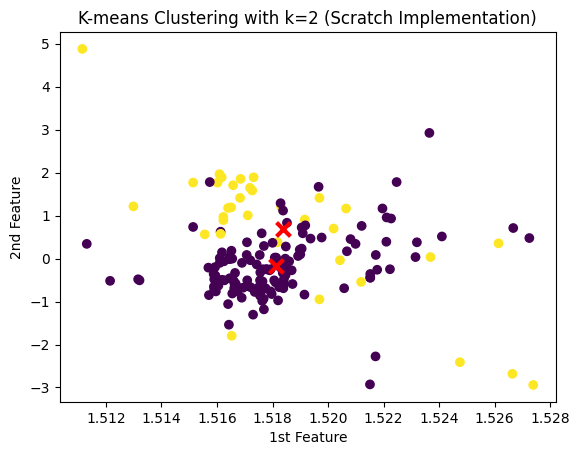

In [ ]:
# Plot the clusters along with the cluster centers
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels_scratch)
plt.scatter(kmeans_scratch.centers[:, 0], kmeans_scratch.centers[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.title('K-means Clustering with k=2 (Scratch Implementation)')
plt.show()

In [ ]:
# Calculate the Sum of Squared Errors (SSE) for implementation using sklearn
sse = 0
for i in range(len(X_train)):
    center = kmeans.cluster_centers_[train_labels[i]]
    squared_dist = np.sum((X_train[i] - center) ** 2)
    sse += squared_dist
print(f"SSE: {sse}")

SSE: 2486.574840097046


In [ ]:
# Calculate the Sum of Squared Errors (SSE) for implementation done from scratch
sse = 0
for i in range(len(X_train)):
    center = kmeans_scratch.centers[train_labels_scratch[i]]
    squared_dist = np.sum((X_train[i] - center) ** 2)
    sse += squared_dist
print(f"SSE: {sse}")

SSE: 628.7736671602111


Based on the SSE scores, we can see that the clustering implentation done from scratch has a lower SSE than the clustering in implementation using sklearn. Thus clustering in implentation done from scratch is better than clustering in implementation using sklearn as to how well the data points are clustered around their respective centers.





